<a href="https://colab.research.google.com/github/Ryukijano/Deep-Reinforcement-Learning-and-Hugging-Face/blob/master/DiamondJAX_00_SetUp_own.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="text-align: center">
  <img src="https://github.com/KarolisRam/MineRL2021-Intro-baselines/blob/main/img/colab_banner.png?raw=true">
</div>

# Introduction
This notebook is the installation part for the [MineRL 2022](https://minerl.io/) competition, building on the original introductory notebooks created for the MineRL 2021 competition.

## There's a video to explain...
Please visit [this intro YouTube video](https://youtu.be/8yIrWcyWGek) to see some background information.  Hopefully, this will lead to a number of additional videos that explore what can be done in this environment...

And if you see me=@mdda online, then please say "Hi!"

## Software 2.0
The approach we are going to use, where we took some human written code and replaced it with an AI component is quite similar to how Tesla approaches self driving cars. See this talk by Andrej Karpathy, Director of AI at Tesla:  
[Building the Software 2.0 Stack](https://databricks.com/session/keynote-from-tesla)


# Setup

In [1]:
%%capture
!sudo add-apt-repository -y ppa:openjdk-r/ppa
!sudo apt-get purge openjdk-*
!sudo apt-get install openjdk-8-jdk
!sudo apt-get install xvfb xserver-xephyr vnc4server python-opengl ffmpeg
# Takes ~1min to run this

In [2]:
# This takes ~22mins - which would hit us every time we start Colab
#   So we'll do it once, and store a '.tar.gz' of the installation into our
#   Google Drive, so that we can get it back much quicker the second time!

%%capture
!pip3 install --upgrade minerl # Default is 0.4.4, we want 1.0.0 for VPT
!pip3 uninstall minerl
!pip3 install git+https://github.com/minerllabs/minerl@v1.0.0

!pip3 install pyvirtualdisplay
!pip3 install -U colabgymrender

In [3]:
import os, sys, time

mine_env = 'mine_env'
mine_env_full = f'/content/{mine_env}'
mine_tar = f'{mine_env}.tar.gz'

if mine_env_full not in sys.path:
  sys.path.insert(0, mine_env_full)
  os.environ['PYTHONPATH'] += f':{mine_env_full}'

mine_env, mine_env_full, mine_tar

('mine_env', '/content/mine_env', 'mine_env.tar.gz')

In [4]:
# We'll connect to our Google Drive here, and see whether we've already saved off a copy
#   This will ask permission to 'connect to your drive' : The answer is 'Yes'!
MINE_ENV_IS_NEW = True

from google.colab import drive
drive.mount('/gdrive')
if os.path.isfile(f'/gdrive/MyDrive/{mine_tar}'):
  ! cp /gdrive/MyDrive/$mine_tar ./$mine_tar
  ! ls -l ./$mine_tar
  # e.g.: -rw------- 1 root root 1510118446 Jun 26 08:48 ./mine_env.tar.gz
  ! tar -tzf ./$mine_tar | grep minerl | head -5
  ! tar -xzf ./$mine_tar

  MINE_ENV_IS_NEW = False
  # Takes 1min too (huge saving!)
"DONE"

Mounted at /gdrive


'DONE'

In [ ]:
# Build the mine_env if necessary
try:
  from pyvirtualdisplay import Display
except :
  !pip3 install --target=$mine_env git+https://github.com/minerllabs/minerl@v1.0.0   # 21 mins
  # https://stackoverflow.com/questions/55833509/attributeerror-type-object-callable-has-no-attribute-abc-registry
  !mv $mine_env/typing.py $mine_env/MEH-typing.py  # Fix for Python3.7 ...

  !pip3 install --target=$mine_env pyvirtualdisplay  # 4 secs
  !pip3 install --target=$mine_env --upgrade colabgymrender # 22 secs

  MINE_ENV_IS_NEW = True
  # NB: some restart notices in the output ... but there's no need to restart!
  #     In any case, please wait for the 'DONE' message to print out
f"DONE, with MINE_ENV_IS_NEW={MINE_ENV_IS_NEW}"

'MINE_ENV_IS_NEW=False'

In [5]:
! du -b mine_env | tail -5  # mine_env = ~ 2,094,031,775 bytes overall

du: cannot access 'mine_env': No such file or directory


In [ ]:
if MINE_ENV_IS_NEW: #  or True
  # ! ls -l /gdrive/MyDrive/mine*
  ! rm -f ./$mine_tar
  ! tar -czf ./$mine_tar $mine_env
  ! ls -l ./$mine_tar
  # Without running the env...
  # -rw-r--r-- 1 root root 1505020174 Jun 26 07:26 ./mine_env.tar.gz
  # Once the minerl env has been reset once (i.e. java has built...)
  # -rw------- 1 root root 1511976116 Jun 26 08:43 ./mine_env.tar.gz
  ! tar -tzf ./$mine_tar | head
  ! cp ./$mine_tar /gdrive/MyDrive/
  ! ls -l /gdrive/MyDrive/$mine_tar
"DONE"

'DONE'

# Import Libraries

In [6]:
import os

import numpy as np

import gym
import minerl

from tqdm.notebook import tqdm
from colabgymrender.recorder import Recorder
from pyvirtualdisplay import Display

import logging
logging.disable(logging.ERROR) # reduce clutter, remove if something doesn't work to see the error logs.

np.__version__  # '1.21.6' => that this is reading from our ~/mine_env directory

ModuleNotFoundError: ignored

In [ ]:
import cv2
#from google.colab.patches import cv2_imshow
#from PIL import Image
import matplotlib.pylab as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
disp = Display(visible=0, backend="xvfb")
disp.start();

In [ ]:
env = gym.make("MineRLBasaltBuildVillageHouse-v0")

In [ ]:
env.action_space.sample().keys()

odict_keys(['ESC', 'attack', 'back', 'camera', 'drop', 'forward', 'hotbar.1', 'hotbar.2', 'hotbar.3', 'hotbar.4', 'hotbar.5', 'hotbar.6', 'hotbar.7', 'hotbar.8', 'hotbar.9', 'inventory', 'jump', 'left', 'pickItem', 'right', 'sneak', 'sprint', 'swapHands', 'use'])

In [ ]:
# Have a look at a few actions we might do:
for _ in range(10):
  print( env.action_space.sample() )

OrderedDict([('ESC', array(1)), ('attack', array(0)), ('back', array(1)), ('camera', array([-101.287346,   95.40787 ], dtype=float32)), ('drop', array(1)), ('forward', array(1)), ('hotbar.1', array(1)), ('hotbar.2', array(1)), ('hotbar.3', array(0)), ('hotbar.4', array(0)), ('hotbar.5', array(1)), ('hotbar.6', array(0)), ('hotbar.7', array(0)), ('hotbar.8', array(0)), ('hotbar.9', array(0)), ('inventory', array(1)), ('jump', array(0)), ('left', array(0)), ('pickItem', array(1)), ('right', array(1)), ('sneak', array(0)), ('sprint', array(1)), ('swapHands', array(0)), ('use', array(0))])
OrderedDict([('ESC', array(0)), ('attack', array(1)), ('back', array(1)), ('camera', array([ -20.134407, -152.25772 ], dtype=float32)), ('drop', array(0)), ('forward', array(0)), ('hotbar.1', array(1)), ('hotbar.2', array(0)), ('hotbar.3', array(0)), ('hotbar.4', array(0)), ('hotbar.5', array(0)), ('hotbar.6', array(0)), ('hotbar.7', array(0)), ('hotbar.8', array(0)), ('hotbar.9', array(0)), ('inventory'

In [ ]:
t0=time.time()
obs = env.reset()  # First obs is thrown away...
print(f"{(time.time()-t0):.2f}sec for env.reset")
# 275.65sec = 4mins for first time, 80.73sec second time (due to compilation of java files?)

104.51sec for env.reset


0.25sec for env.step


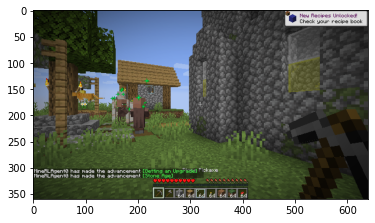

0.19sec for env.step


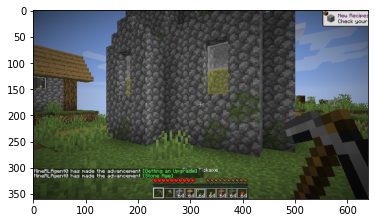

0.27sec for env.step


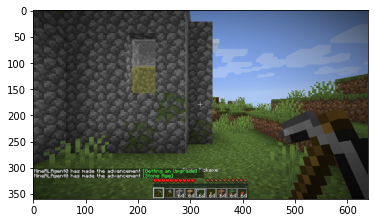

0.23sec for env.step


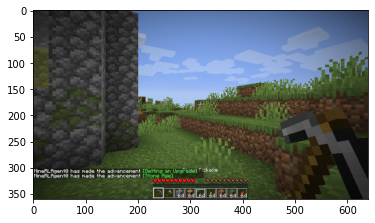

0.14sec for env.step


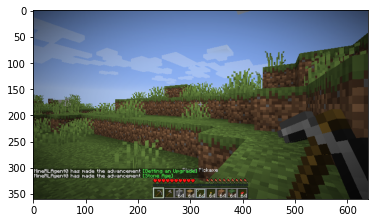

0.22sec for env.step


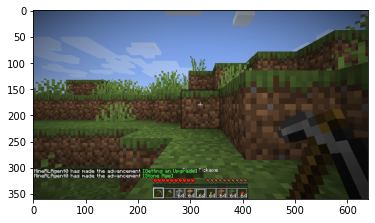

0.18sec for env.step


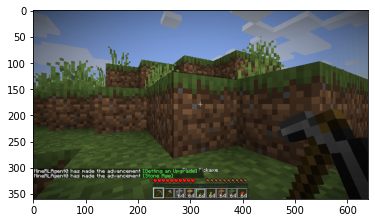

0.22sec for env.step


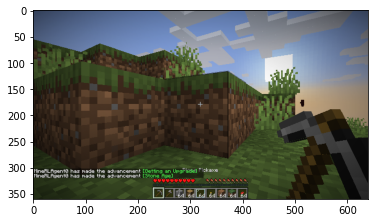

0.22sec for env.step


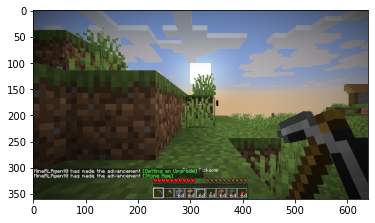

0.15sec for env.step


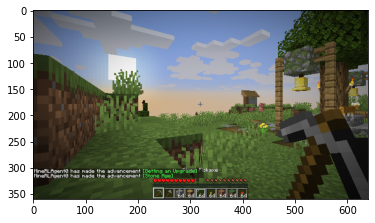

0.25sec for env.step


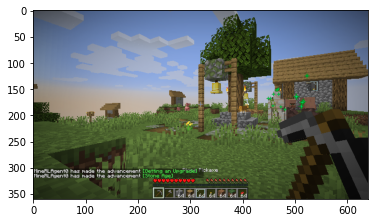

0.21sec for env.step


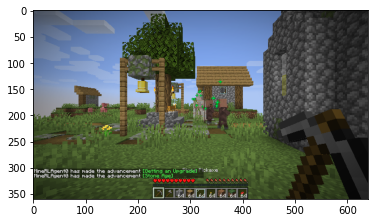

0.12sec for env.step


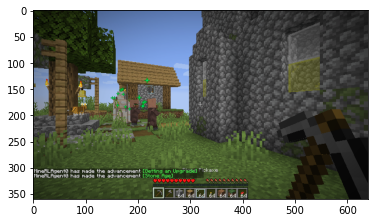

'6.15sec for whole spin'

In [ ]:
# Now that Steve has been spawned, do some actions...
t0=time.time()

done, iter = False, 0
while not done:
    ac = env.action_space.noop()
    # Spin around to see what is around us
    ac["camera"] = [0, +30]  # (pitch, yaw) deltas in degrees : +30 => turn to right

    t1=time.time()
    obs, reward, done, info = env.step(ac)
    #print(obs, reward, info)  # NB: Yikes : obs is only the image!
    #  obs = Dict(pov:Box(low=0, high=255, shape=(360, 640, 3)))
    #print(pov.shape) # (360, 640, 3)  Image spec agrees with docs!
    print(f"{(time.time()-t1):.2f}sec for env.step")  # Approx 0.25sec per step

    pov = obs["pov"]

    #env.render()  # This does an internal cv2.imshow that colab rejects
    #cv2_imshow(pov[:, :, ::-1])
    #cv2.waitKey(1)

    plt.imshow(pov)
    plt.show()
    iter +=1
    if iter>12: done=True

f"{(time.time()-t0):.2f}sec for whole spin"

In [ ]:
# Set up a simple testing function
def action_step(action):
  ac = env.action_space.noop()
  ac.update(action)
  obs, reward, done, info = env.step(ac)
  plt.imshow(obs["pov"])
  plt.show()

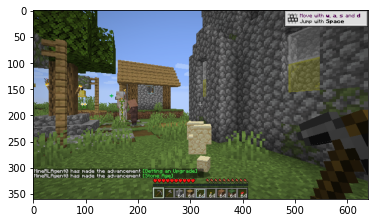

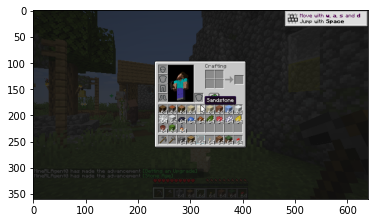

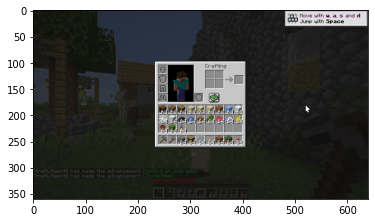

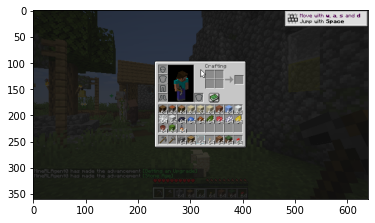

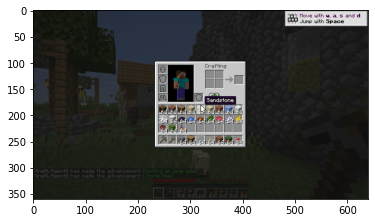

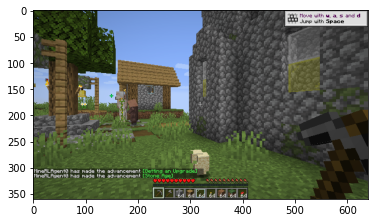

In [ ]:
action_step({})
action_step(dict(inventory=[1]))
action_step(dict(camera=[0, +30]))
action_step(dict(camera=[-10, -30]))
action_step(dict(camera=[+10, 0]))
action_step(dict(inventory=[1]))  # Put inventory away? = Yes, if it is showing

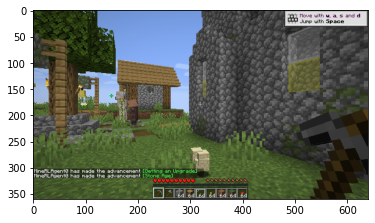

In [ ]:
#action_step({'inventory':[1]})  # Put inventory away? = NOT jump, sneak, use, hotbar.X, back
action_step({})  # NOOP

In [ ]:
# Set up a simple calibration function
import cv2
from google.colab.patches import cv2_imshow

def action_step_calibrate(x_off,y_off):
  ac = env.action_space.noop()
  ac.update(dict(camera=[y_off, x_off]))
  obs, reward, done, info = env.step(ac)
  im = obs["pov"][100:250, 200:400,:]
  cv2_imshow(cv2.cvtColor(im, cv2.COLOR_RGB2BGR))
  ac = env.action_space.noop()
  ac.update(dict(camera=[-y_off, -x_off]))  # Move back
  obs, reward, done, info = env.step(ac)

In [ ]:
action_step({})
action_step(dict(inventory=[1]))

action_step_calibrate(0, 0)
for x_off in [+0.62, +1.61, +3.22, +5.81, +10.0]:
  print(f"x_off={x_off}")
  action_step_calibrate(x_off,0)
  action_step_calibrate(-x_off,0)
for y_off in [+0.62, +1.61, +3.22, +5.81, +10.0]:
  print(f"y_off={y_off}")
  action_step_calibrate(0, y_off)
  action_step_calibrate(0, -y_off)

action_step(dict(inventory=[1]))  # Put inventory away? = Yes, if it is showing

In [ ]:
! nvidia-smi

Sun Jun 26 16:06:10 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
env.close()

In [ ]:
disp.stop();

In [ ]:
# THE END! - We'll be using this set-up in the future!